# 在正確的時間點停止模型訓練
Epoch指定太多會造成過度擬合，指定太少又會低度擬合。在Keras API裡提供了可以提早停止模型訓練的EarlyStopping函式，可以自動在正確的時間點停止訓練。

Epoch 1/50
56/56 [==============================] - 2s 10ms/step - loss: 0.7259 - accuracy: 0.4746 - val_loss: 0.6781 - val_accuracy: 0.6159
Epoch 2/50
56/56 [==============================] - 0s 6ms/step - loss: 0.6477 - accuracy: 0.6594 - val_loss: 0.6100 - val_accuracy: 0.6594
Epoch 3/50
56/56 [==============================] - 0s 7ms/step - loss: 0.6014 - accuracy: 0.6739 - val_loss: 0.5685 - val_accuracy: 0.6739
Epoch 4/50
56/56 [==============================] - 0s 7ms/step - loss: 0.5716 - accuracy: 0.6703 - val_loss: 0.5380 - val_accuracy: 0.6957
Epoch 5/50
56/56 [==============================] - 0s 9ms/step - loss: 0.5510 - accuracy: 0.6920 - val_loss: 0.5176 - val_accuracy: 0.7174
Epoch 6/50
56/56 [==============================] - 0s 6ms/step - loss: 0.5360 - accuracy: 0.7156 - val_loss: 0.5046 - val_accuracy: 0.7246
Epoch 7/50
56/56 [==============================] - 0s 6ms/step - loss: 0.5249 - accuracy: 0.7210 - val_loss: 0.4933 - val_accuracy: 0.7536
Epoch 8/50
56/56 [=

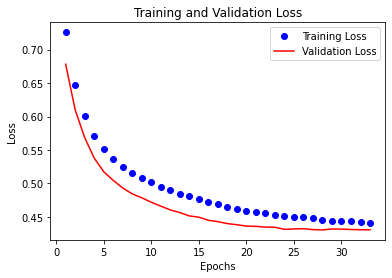

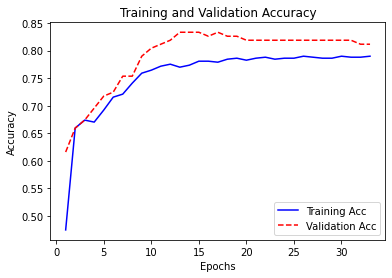

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊

# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 訓練模型
# 建立 EarlyStopping 物件
# monitor參數指定要監控的評估指標，一般使用val_loss，也可以使用val_accuracy
# patience參數指定耐心等待幾次訓練週期，在5次內都沒有出現更好的結果，就提早停止模型訓練
# 在訓練時，epochs的數字就可以設得大一點，callbacks參數放入EarlyStopping的物件
# 若要使用EarlyStopping 必須指定 validation
es = EarlyStopping(monitor="val_loss", verbose=1, patience=5)  
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=10, verbose=1, callbacks=[es])

# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 在模型訓練時自動儲存最佳權重
雖然前面可以做到提早停止，最後一次訓練週期不見得是模型的最佳權重。我們可以使用ModelCheckPoint函式來記錄過程中最好的權重檔。

Epoch 26: early stopping
訓練資料集的準確度 = 0.80
測試資料集的準確度 = 0.76


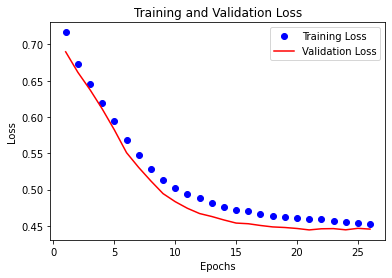

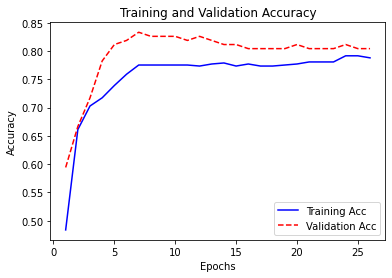

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

np.random.seed(10)  # 指定亂數種子
# 載入糖尿病資料集
df = pd.read_csv("./diabetes.csv")
dataset = df.values
np.random.shuffle(dataset)  # 使用亂數打亂資料
# 分割成特徵資料和標籤資料
X = dataset[:, 0:8]
Y = dataset[:, 8]
# 特徵標準化
X -= X.mean(axis=0)
X /= X.std(axis=0)
# One-hot編碼
Y = to_categorical(Y)
# 分割訓練和測試資料集
X_train, Y_train = X[:690], Y[:690]     # 訓練資料前690筆
X_test, Y_test = X[690:], Y[690:]       # 測試資料後78筆
# 定義模型
model = Sequential()
model.add(Dense(8, input_shape=(8,), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
# model.summary()   # 顯示模型摘要資訊
# 編譯模型
model.compile(loss="binary_crossentropy", optimizer="adam", 
              metrics=["accuracy"])
# 建立 EarlyStopping 物件
es = EarlyStopping(monitor="val_loss", verbose=1, patience=5)

# 建立 ModelCheckpoint 物件
# 可以指定權重檔存檔的檔名。
filename = "best_model.h5"
#如果使用週期數跟準確度記錄成檔名，可方便查閱結果，但會產生很多檔案（每一次週期的訓練結果如果比以往更好，就會存一個檔下來）
#filename = "weights-{epoch:02d}-{val_accuracy:.2f}.h5"
mc = ModelCheckpoint(filename, monitor="val_loss", verbose=0, save_best_only=True)

# 訓練模型時，callbacks參數清單內指定兩個物件名稱
history = model.fit(X_train, Y_train, validation_split=0.2, 
          epochs=50, batch_size=10, 
          verbose=0, callbacks=[es, mc])
# 評估模型
loss, accuracy = model.evaluate(X_train, Y_train, verbose=0)
print("訓練資料集的準確度 = {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print("測試資料集的準確度 = {:.2f}".format(accuracy))
# 顯示訓練和驗證損失圖表
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["val_loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# 顯示訓練和驗證準確度
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()